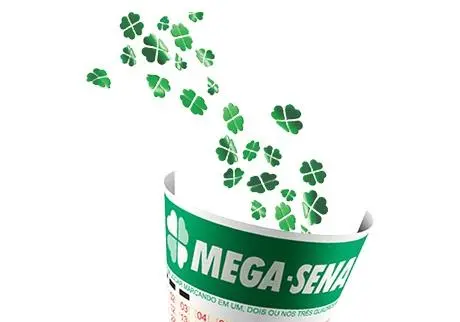

# Title

In [13]:
# Análise de dados do concurso da mega-sena
# ---
# fonte de dados: http://www.loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/!ut/p/a1/04_Sj9CPykssy0xPLMnMz0vMAfGjzOLNDH0MPAzcDbwMPI0sDBxNXAOMwrzCjA0sjIEKIoEKnN0dPUzMfQwMDEwsjAw8XZw8XMwtfQ0MPM2I02-AAzgaENIfrh-FqsQ9wNnUwNHfxcnSwBgIDUyhCvA5EawAjxsKckMjDDI9FQE-F4ca/dl5/d5/L2dBISEvZ0FBIS9nQSEh/pw/Z7_HGK818G0K8DBC0QPVN93KQ10G1/res/id=historicoHTML/c=cacheLevelPage/=/
# ---
# Obs: A escrita correta da palavra é megassena, seguindo o acordo ortográfico vigente,
# mas em virtude de se tratar de marca registrada a expressão "mega-sena"
# é considerada exceção à regra.

# Head

In [1]:
# Objetivo: Antes de mais nada, praticar a linguagem Python
# e quem sabe com sorte ganhar o prêmio! :-)
# Investigar as ocorrências de números aleatórios,
# porque trata-se de evento independente,
# e tentar encontrar padrões nas séries!
# by geanclm in 20/02/2022 at 16:43h

# Local files

In [5]:
pwd

'C:\\Users\\geanc\\Downloads\\DATA SCIENCE\\python_project_3'

In [6]:
# arquivos utilizados
!dir img\*.webp *http.ipynb

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 2656-7D0D

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\python_project_3\img

23/02/2022  13:02             9.146 mg.webp
               1 arquivo(s)          9.146 bytes

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\python_project_3

26/02/2022  08:01           414.043 mega_http.ipynb
               1 arquivo(s)        414.043 bytes
               0 pasta(s)   627.775.037.440 bytes dispon¡veis


# Import libs

In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# biblioteca para visualizar os dados faltantes do data frame
# Obs: pip install missingno
import missingno

import numpy as np

# biblioteca necessária para importar dados diretamente da url http
import requests

# Load Data

In [11]:
# Obs: antes de extrair o conteúdo de uma url é importante verificar
# se existe o arquivo "robots.txt, indicativo de que 
# as páginas podem ser acessas para obtenção dos dados de forma legal com o WEBScrapping"
# No caso do concurso da Mega-sena os dados já são disponibilizados para download,
# logo o WEBScrapping também pode ser executado para extrair a relação dos dados.
# - - -
# extrair dados da mega-sena diretamente do site
url = 'http://www.loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/!ut/p/a1/04_Sj9CPykssy0xPLMnMz0vMAfGjzOLNDH0MPAzcDbwMPI0sDBxNXAOMwrzCjA0sjIEKIoEKnN0dPUzMfQwMDEwsjAw8XZw8XMwtfQ0MPM2I02-AAzgaENIfrh-FqsQ9wNnUwNHfxcnSwBgIDUyhCvA5EawAjxsKckMjDDI9FQE-F4ca/dl5/d5/L2dBISEvZ0FBIS9nQSEh/pw/Z7_HGK818G0K8DBC0QPVN93KQ10G1/res/id=historicoHTML/c=cacheLevelPage/=/'
response = requests.get(url)
if response.status_code == 200:
    df_http = pd.read_html(response.content, encoding='utf-8',)[0]

In [12]:
df_http.rename(columns={
    'Unnamed: 0':'Concurso',
    'Unnamed: 1':'Local',
    'Unnamed: 2':'Data do Sorteio',
    'Unnamed: 3':'Coluna 1',
    'Unnamed: 4':'Coluna 2',
    'Unnamed: 5':'Coluna 3',
    'Unnamed: 6':'Coluna 4',
    'Unnamed: 7':'Coluna 5',
    'Unnamed: 8':'Coluna 6',
    'Unnamed: 9':'Ganhadores Faixa 1',
    'Unnamed: 10':'Ganhadores Faixa 2',
    'Unnamed: 11':'Ganhadores Faixa 3',
    'Unnamed: 12':'Rateio Faixa 1',
    'Unnamed: 13':'Rateio Faixa 2',
    'Unnamed: 14':'Rateio Faixa 3',
    'Unnamed: 15':'Cidade',
    'Unnamed: 16':'Valor Arrecadado',
    'Unnamed: 17':'Estimativa para o próximo concurso',
    'Unnamed: 18':'Valor Acumulado Próximo Concurso',
    'Unnamed: 19':'Acumulado',
    'Unnamed: 20':'Sorteio Especial',
    'Unnamed: 21':'Observação'
    }, inplace=True)

# Data visualization

In [60]:
df_http.tail(15)

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 1,Rateio Faixa 2,Rateio Faixa 3,Cidade,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
5600,2445,"SÃO PAULO, SP",19/01/2022,11.0,25.0,32.0,37.0,47.0,56.0,0.0,...,000,38.34537,90770.00000,NaN,41.899.88250,22.000.00000,2.601.09332,SIM,SIM,NaN
5602,2446,"SÃO PAULO, SP",22/01/2022,1.0,13.0,27.0,41.0,51.0,58.0,0.0,...,000,41.30551,1.00519,NaN,53.015.03100,28.500.00000,3.405.46390,SIM,SIM,NaN
5604,2447,"SÃO PAULO, SP",25/01/2022,13.0,19.0,29.0,42.0,49.0,52.0,0.0,...,000,48.16742,93832.00000,NaN,35.088.26400,31.000.00000,3.937.84060,SIM,SIM,NaN
5606,2448,"SÃO PAULO, SP",27/01/2022,18.0,30.0,32.0,35.0,40.0,48.0,0.0,...,000,51.38747,1.10251,NaN,47.238.08850,36.000.00000,4.654.56052,SIM,SIM,NaN
5608,2449,"SÃO PAULO, SP",29/01/2022,14.0,20.0,21.0,31.0,49.0,52.0,1.0,...,36.777.76710,50.66964,1.24768,BLUMENAU SC,57.124.24650,20.000.00000,5.521.27816,NAO,SIM,NaN
5609,BLUMENAU,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5611,2450,"SÃO PAULO, SP",02/02/2022,2.0,6.0,11.0,15.0,17.0,39.0,0.0,...,000,26.81482,63924.00000,NaN,43.718.16600,26.000.00000,6.184.59204,SIM,SIM,NaN
5613,2451,"SÃO PAULO, SP",05/02/2022,13.0,26.0,31.0,46.0,51.0,60.0,1.0,...,26.422.34701,55.49034,1.04857,BELO HORIZONTE MG,57.746.79450,3.000.00000,7.060.75529,NAO,SIM,NaN
5614,BELO HORIZONTE,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5616,2452,"SÃO PAULO, SP",09/02/2022,8.0,10.0,51.0,56.0,57.0,58.0,0.0,...,000,72.47070,1.12478,NaN,28.910.09700,7.000.00000,7.499.39376,SIM,SIM,NaN


In [13]:
df_http.shape

(5627, 22)

In [14]:
df_http.columns

Index(['Concurso', 'Local', 'Data do Sorteio', 'Coluna 1', 'Coluna 2',
       'Coluna 3', 'Coluna 4', 'Coluna 5', 'Coluna 6', 'Ganhadores Faixa 1',
       'Ganhadores Faixa 2', 'Ganhadores Faixa 3', 'Rateio Faixa 1',
       'Rateio Faixa 2', 'Rateio Faixa 3', 'Cidade', 'Valor Arrecadado',
       'Estimativa para o próximo concurso',
       'Valor Acumulado Próximo Concurso', 'Acumulado', 'Sorteio Especial',
       'Observação'],
      dtype='object')

In [63]:
df_http.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 86 to 5297
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Concurso                            224 non-null    object 
 1   Local                               224 non-null    object 
 2   Data do Sorteio                     224 non-null    object 
 3   Coluna 1                            224 non-null    float64
 4   Coluna 2                            224 non-null    float64
 5   Coluna 3                            224 non-null    float64
 6   Coluna 4                            224 non-null    float64
 7   Coluna 5                            224 non-null    float64
 8   Coluna 6                            224 non-null    float64
 9   Ganhadores Faixa 1                  224 non-null    float64
 10  Ganhadores Faixa 2                  224 non-null    float64
 11  Ganhadores Faixa 3                  224 non

In [18]:
df_http.Acumulado.value_counts(normalize=False)

SIM    1896
NAO     561
Name: Acumulado, dtype: int64

In [52]:
df_http['Rateio Faixa 1'].sum

<bound method Series.sum of 0               000
2       2.307.16223
3               NaN
5         391.19251
6               NaN
           ...     
5618            000
5620            000
5622            000
5624            000
5626            000
Name: Rateio Faixa 1, Length: 3171, dtype: object>

In [59]:
df_http.tail(6).T

,5616,5618,5620,5622,5624,5626
Concurso,2452,2453,2454,2455,2456,2457
Local,"SÃO PAULO, SP","SÃO PAULO, SP","SÃO PAULO, SP","SÃO PAULO, SP","SÃO PAULO, SP","SÃO PAULO, SP"
Data do Sorteio,09/02/2022,12/02/2022,16/02/2022,19/02/2022,22/02/2022,24/02/2022
Coluna 1,8,10,9,21,28,10
Coluna 2,10,14,14,38,34,19
Coluna 3,51,15,22,50,40,46
Coluna 4,56,24,24,53,41,47
Coluna 5,57,34,44,56,52,49
Coluna 6,58,44,47,59,55,50
Ganhadores Faixa 1,0,0,0,0,0,0


In [25]:
df_http['Local'].mode()[0]

'SÃO PAULO, SP'

In [26]:
df_http['Ganhadores Faixa 1'].mean()

0.3463573463573464

In [27]:
df_http['Ganhadores Faixa 1'].median()

0.0

In [29]:
df_http.mode().tail()

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 1,Rateio Faixa 2,Rateio Faixa 3,Cidade,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
2452,NaN,NaN,31/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,128.30401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2453,NaN,NaN,31/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,154.80890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2454,NaN,NaN,31/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,169.33814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2455,NaN,NaN,31/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12253.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,NaN,NaN,31/12/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,95179.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_http.isnull().sum()

Concurso                              2658
Local                                 2545
Data do Sorteio                       3170
Coluna 1                              3170
Coluna 2                              3170
Coluna 3                              3170
Coluna 4                              3170
Coluna 5                              3170
Coluna 6                              3170
Ganhadores Faixa 1                    3170
Ganhadores Faixa 2                    3170
Ganhadores Faixa 3                    3170
Rateio Faixa 1                        3170
Rateio Faixa 2                        3170
Rateio Faixa 3                        3170
Cidade                                5089
Valor Arrecadado                      3170
Estimativa para o próximo concurso    3170
Valor Acumulado Próximo Concurso      3170
Acumulado                             3170
Sorteio Especial                      3170
Observação                            4733
dtype: int64

In [32]:
df_http.describe()

,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,Ganhadores Faixa 2,Ganhadores Faixa 3,Rateio Faixa 2,Rateio Faixa 3
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,8.618234,17.303622,26.310948,35.030525,43.509972,52.185592,0.346357,111.627595,7164.843712,70.109723,38763.216969
std,7.002498,9.130110,9.988928,9.806531,9.022863,6.950716,1.328136,232.506473,10970.192495,1935.396357,25189.204396
min,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000,0.000000,4.000000,683.000000,1.024410,1.002650
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000,0.000000,47.000000,3663.000000,14.023200,19605.000000
50%,7.000000,16.000000,26.000000,35.000000,44.000000,54.000000,0.000000,75.000000,5301.000000,21.346790,31587.000000
75%,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000,0.000000,117.000000,7628.000000,34.383160,56645.000000
max,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000,52.000000,7688.000000,303857.000000,95179.000000,99519.000000


In [35]:
# df_http.notna()

In [36]:
df_http.isna()

,Concurso,Local,Data do Sorteio,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Ganhadores Faixa 1,...,Rateio Faixa 1,Rateio Faixa 2,Rateio Faixa 3,Cidade,Valor Arrecadado,Estimativa para o próximo concurso,Valor Acumulado Próximo Concurso,Acumulado,Sorteio Especial,Observação
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
5623,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5624,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
5625,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

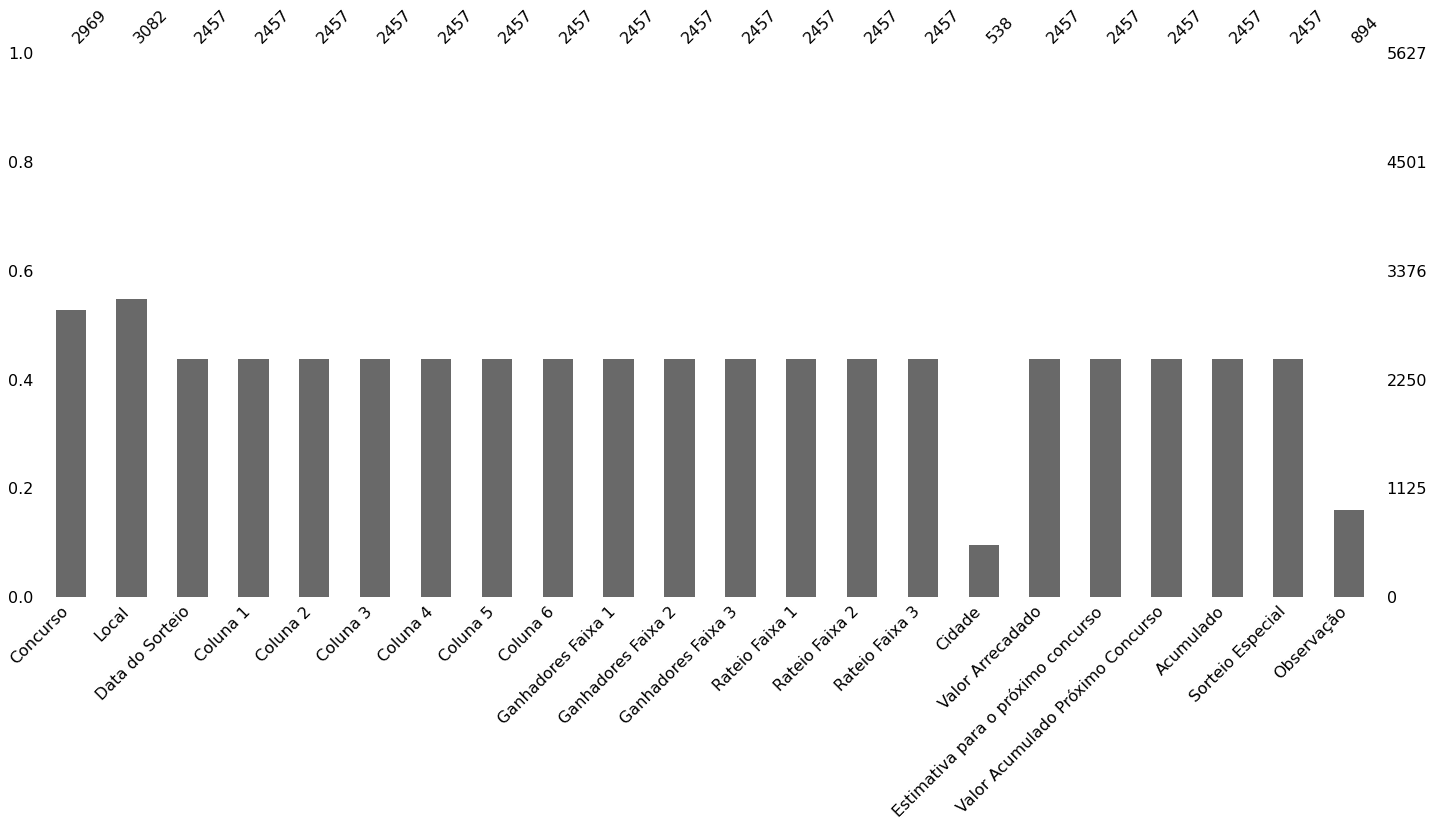

In [37]:
# Visualizar através do gráfico os campos com dados ausentes
missingno.bar(df_http)

<AxesSubplot:>

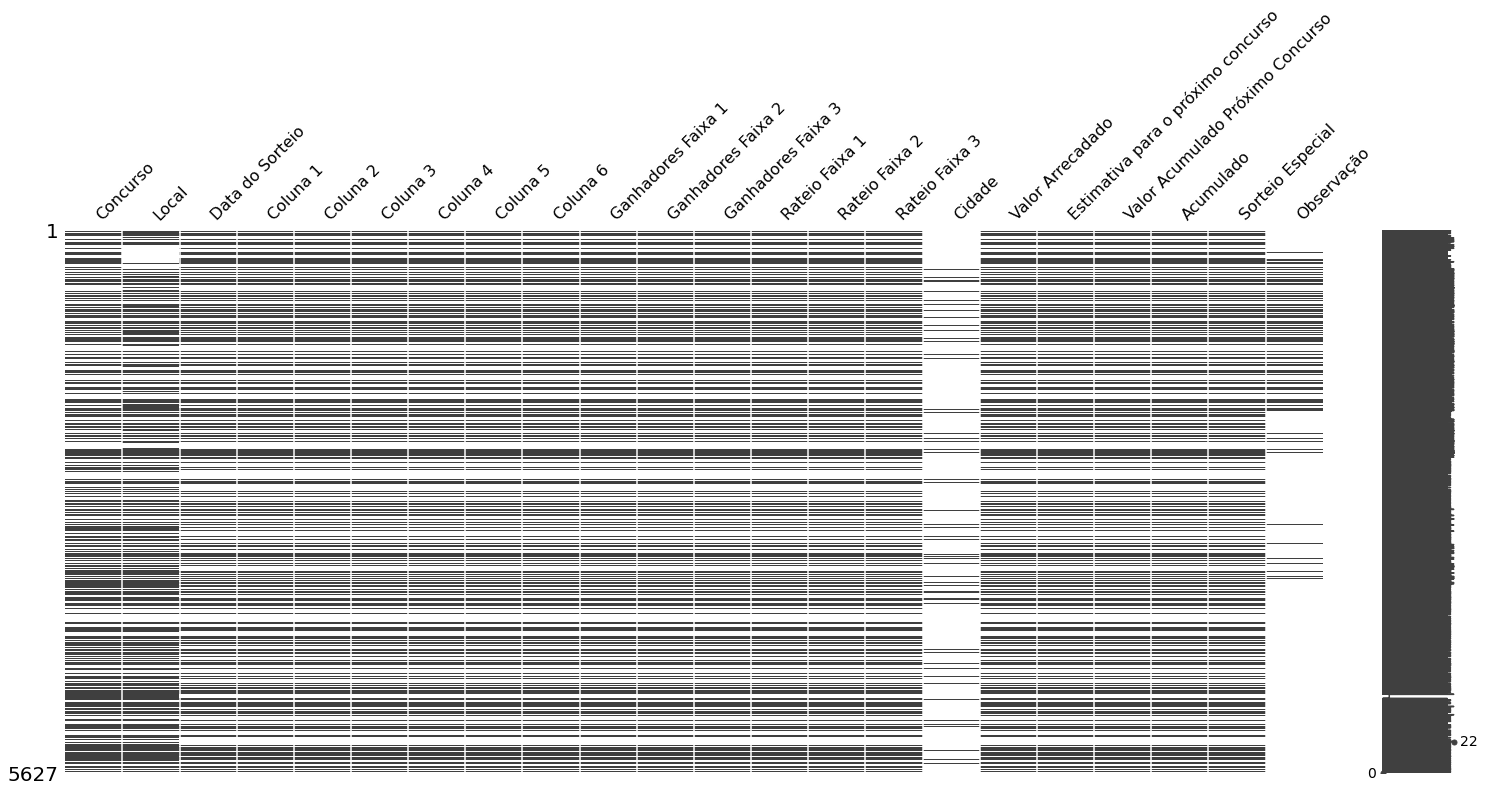

In [38]:
missingno.matrix(df_http)

In [39]:
# quantidade de dados ausentes na coluna do data frame
np.sum(df_http['Local'].isna())

2545

In [40]:
# percentual de dados faltantes na coluna do data frame
round((np.mean(df_http['Local'].isna()))*100, ndigits=2)

45.23

In [42]:
# relalçao de dados faltantes no data frame
for col in df_http.columns:
    perc = np.mean(df_http[col].isna())
    print (f'{col} => {round(perc*100, ndigits=2)}%')

Concurso => 47.24%
Local => 45.23%
Data do Sorteio => 56.34%
Coluna 1 => 56.34%
Coluna 2 => 56.34%
Coluna 3 => 56.34%
Coluna 4 => 56.34%
Coluna 5 => 56.34%
Coluna 6 => 56.34%
Ganhadores Faixa 1 => 56.34%
Ganhadores Faixa 2 => 56.34%
Ganhadores Faixa 3 => 56.34%
Rateio Faixa 1 => 56.34%
Rateio Faixa 2 => 56.34%
Rateio Faixa 3 => 56.34%
Cidade => 90.44%
Valor Arrecadado => 56.34%
Estimativa para o próximo concurso => 56.34%
Valor Acumulado Próximo Concurso => 56.34%
Acumulado => 56.34%
Sorteio Especial => 56.34%
Observação => 84.11%


In [43]:
df_http.columns.values

array(['Concurso', 'Local', 'Data do Sorteio', 'Coluna 1', 'Coluna 2',
       'Coluna 3', 'Coluna 4', 'Coluna 5', 'Coluna 6',
       'Ganhadores Faixa 1', 'Ganhadores Faixa 2', 'Ganhadores Faixa 3',
       'Rateio Faixa 1', 'Rateio Faixa 2', 'Rateio Faixa 3', 'Cidade',
       'Valor Arrecadado', 'Estimativa para o próximo concurso',
       'Valor Acumulado Próximo Concurso', 'Acumulado',
       'Sorteio Especial', 'Observação'], dtype=object)

In [45]:
df_http.Local.unique

<bound method Series.unique of 0             Brasília, DF
1                      NaN
2       Belo Horizonte, MG
3                       PR
4                      NaN
               ...        
5622         SÃO PAULO, SP
5623                   NaN
5624         SÃO PAULO, SP
5625                   NaN
5626         SÃO PAULO, SP
Name: Local, Length: 5627, dtype: object>

In [46]:
df_http.dtypes

Concurso                               object
Local                                  object
Data do Sorteio                        object
Coluna 1                              float64
Coluna 2                              float64
Coluna 3                              float64
Coluna 4                              float64
Coluna 5                              float64
Coluna 6                              float64
Ganhadores Faixa 1                    float64
Ganhadores Faixa 2                    float64
Ganhadores Faixa 3                    float64
Rateio Faixa 1                         object
Rateio Faixa 2                        float64
Rateio Faixa 3                        float64
Cidade                                 object
Valor Arrecadado                       object
Estimativa para o próximo concurso     object
Valor Acumulado Próximo Concurso       object
Acumulado                              object
Sorteio Especial                       object
Observação                        

# Data preparation

In [61]:
df_http = df_http.dropna(how='all') # apagar somente linhas com todos os campos NAN

In [ ]:
# df_http = df_http.drop(['Cidade'],axis = 1)

In [119]:
pd.options.display.float_format = "{:.0f}".format #formatar data frame

In [120]:
df = df.drop([
#     'Ganhadores Faixa 2', 'Ganhadores Faixa 3',
#        'Rateio Faixa 1',
        'Rateio Faixa 2', 'Rateio Faixa 3',
#               'Cidade',
#        'Unnamed: 16',
    'Valor Arrecadado',
#        'Estimativa para o próximo concurso',
       'Valor Acumulado Próximo Concurso',
#               'Acumulado',
       'Sorteio Especial', 'Observação'],axis = 1)

In [9]:
# DESAFIO EXTRA!

# verificar essa etapa para o webscraping
# importar dados diretamente do site

# import requests
# from bs4 import BeautifulSoup
# url = 'C:/Users/geanc/Downloads/DATA%20SCIENCE/python_project_3/sena.html'
# response = requests.get(url)
# contend = response.content
# # site = BeautifulSoup(contend, 'html.parser')
# # print (type(site))
# print (site.prettify()) # importante para identificar a DIV
# # mega = site.find('div', attrs={'class':'BNeawe iBp4i AP7Wnd'})
# # url.text

# url = 'http://www.loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/!ut/p/a1/04_Sj9CPykssy0xPLMnMz0vMAfGjzOLNDH0MPAzcDbwMPI0sDBxNXAOMwrzCjA0sjIEKIoEKnN0dPUzMfQwMDEwsjAw8XZw8XMwtfQ0MPM2I02-AAzgaENIfrh-FqsQ9wNnUwNHfxcnSwBgIDUyhCvA5EawAjxsKckMjDDI9FQE-F4ca/dl5/d5/L2dBISEvZ0FBIS9nQSEh/pw/Z7_HGK818G0K8DBC0QPVN93KQ10G1/res/id=historicoHTML/c=cacheLevelPage/=/'
# response = requests.get(url)
# contend = response.content
# site = BeautifulSoup(contend, 'html.parser')
# soup
# print (type(site))
# print (site.prettify()) # importante para identificar a DIV
# bitcoin = site.find('div', attrs={'class':'BNeawe iBp4i AP7Wnd'})
# dolar = site.find('span', attrs={'class':'DFlfde SwHCTb'}) # precisa ter var diferente site
# print ('Bitcoin:', bitcoin.text)
# bitcoin.text
# url = 'file:///C:/Users/geanc/Downloads/DATA%20SCIENCE/python_project_3/fQFbIbfh.htm'
# link = pd.read_html(url)

In [124]:
df.columns

Index(['Concurso', 'Local', 'Data do Sorteio', 'Coluna 1', 'Coluna 2',
       'Coluna 3', 'Coluna 4', 'Coluna 5', 'Coluna 6', 'Ganhadores Faixa 1',
       'Ganhadores Faixa 2', 'Ganhadores Faixa 3', 'Rateio Faixa 1',
       'Estimativa para o próximo concurso', 'Acumulado'],
      dtype='object')

In [126]:
df.columns = ['concurso','local','data',
              'd1','d2','d3','d4','d5','d6',
              'g6','g5','g4',
              'r1',
#               'r2', 'r3',
#               'cidade', 'ufg',
              'estimativa','acumulado']

In [13]:
# df = df.dropna(how='any') #apagar qualquer linhas com pelo menos um NAN

In [14]:
# df['concurso'] = df['concurso'].astype(int)

In [127]:
df = df.set_index('concurso')

In [128]:
# df['data'] = df['data'].apply(lambda _: datetime.strptime(_,"%d/%m/%Y"))
# df['data'].astype('datetime64’)
# pd.to_datetime(df.data, dayfirst=True)
df.data = pd.to_datetime(df['data'], format='%d/%m/%Y')

In [129]:
# corrigir nomes
# df.mask(df == 'SÃƒO PAULO, SP', 'São Paulo, SP')
df.loc[df['local'] == 'BrasÃ­lia, DF', 'local'] = 'Brasília, DF'
df.loc[df['local'] == 'SÃƒO PAULO, SP', 'local'] = 'São Paulo, SP'
df.loc[df['local'] == 'Santo AndrÃ©, SP', 'local'] = 'Santo André, SP'
df.loc[df['local'] == 'BRASÃLIA, DF', 'local'] = 'Brasília, DF'
df.loc[df['local'] == 'BRASÃLIA, DF', 'local'] = 'Brasília, DF'
df.loc[df['local'] == 'BRASILIA, DF', 'local'] = 'Brasília, DF'
df.loc[df['local'] == 'SANTA FÃ‰ DO SUL, SP', 'local'] = 'Santa fé do Sul, SP'
df.loc[df['local'] == 'PORTO UNIÃƒO, SC', 'local'] = 'Porto União, SC'
df.loc[df['local'] == 'JI-PARANÁ, RO', 'local'] = 'JI-PARANÁ, RO'
df.loc[df['local'] == 'SÃ£o Bento do Sul, SC', 'local'] = 'São Bento do Sul, SC'
df.loc[df['local'] == 'FLORIANÃ“POLIS, SC', 'local'] = 'Florianópolis, SC'
df.loc[df['local'] == 'BALNEÃRIO CAMBORIÃš, SC', 'local'] = 'Balneário Camboriú, SC'
df.loc[df['local'] == 'XANXERÃŠ, SC', 'local'] = 'Xanxerê, SC'
df.loc[df['local'] == 'TUBARÃƒO, SC', 'local'] = 'Tubarão, SC'
df.loc[df['local'] == 'RibeirÃ£o Preto, SP', 'local'] = 'Ribeirão Preto, SP'
df.loc[df['local'] == 'JOAÃ‡ABA, SC', 'local'] = 'Joaçaba, SC'
df.loc[df['local'] == 'CRICIÃšMA, SC', 'local'] = 'Criciúma, SC'
df.loc[df['local'] == 'CHAPECÃ“, SC', 'local'] = 'Chapecó, SC'
df.loc[df['local'] == 'SÃƒO JOÃƒO DA BARRA, RJ', 'local'] = 'São João da Barra, RJ'
df.loc[df['local'] == 'POÃ‡OS DE CALDAS, MG', 'local'] = 'Poços de Caldas, MG'
df.loc[df['local'] == 'MACEIÃ“, AL', 'local'] = 'Maceió, AL'
df.loc[df['local'] == 'RIBEIRÃƒO PRETO, SP', 'local'] = 'Ribeirão Preto, SP'
df.loc[df['local'] == 'ANASTÃCIO, MS', 'local'] = 'Anastácio, MS'
df.loc[df['local'] == 'JEQUIÃ‰, BA', 'local'] = 'Jequié, BA'
df.loc[df['local'] == 'CATALÃƒO, GO', 'local'] = 'Catalão, GO'
df.loc[df['local'] == 'APARECIDA DE GOIÃ‚NIA, GO', 'local'] = 'Aparecida de Goiânia, GO'
df.loc[df['local'] == 'CÃCERES, MT', 'local'] = 'Cárceres, MT'
df.loc[df['local'] == 'SANTO ANASTÃCIO, SP', 'local'] = 'Santo Anastácio, SP'
df.loc[df['local'] == 'JUNDIAÃ, SP', 'local'] = 'Jundiaí, SP'
df.loc[df['local'] == 'CAPÃƒO DA CANOA, RS', 'local'] = 'Capão da Canoa, RS'
df.loc[df['local'] == 'MACAPÃ, AP', 'local'] = 'Macapá, AP'
df.loc[df['local'] == 'JUAZEIRO DO NORTE, CE ', 'local'] = 'Juazeiro do Norte, CE'
df.loc[df['local'] == 'TRAMANDAÃ, RS', 'local'] = 'Tramandaí, RS'
df.loc[df['local'] == 'CAPÃƒO DA CANOA, RS', 'local'] = 'Capão da Canoa, RS'
df.loc[df['local'] == 'JOÃƒO PESSOA, PB', 'local'] = 'João Pessoa, PB'
df.loc[df['local'] == 'IMBITUVA, PR, PR', 'local'] = 'Imbituva, PR'
df.loc[df['local'] == 'RIBEIRÃƒO PRETO SP', 'local'] = 'Riberião Preto, SP'
df.loc[df['local'] == 'SÃ£o Paulo, SP', 'local'] = 'São Paulo, SP'
df.loc[df['local'] == 'SÃƒO JOSÃ‰ DO RIO PRETO, SP', 'local'] = 'São José do Rio Preto, SP'
df.loc[df['local'] == 'RIBEIRÃƒO PRETO,, SP', 'local'] = 'Ribeirão Preto, SP'              

In [18]:
# df.cg.value_counts(normalize=False).head(60)

In [130]:
semana = {
'Sunday':'Dom',
'Monday':'Seg',
'Tuesday':'Ter',
'Wednesday':'Qua',
'Thursday':'Qui',
'Friday':'Sex',
'Saturday':'Sáb'
}
df ['semana'] = df['data'].dt.day_name().replace(semana) 

In [131]:
df['accumulated'] = (df['acumulado'] == 'SIM')

In [133]:
df.columns

Index(['local', 'data', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'g6', 'g5', 'g4',
       'r1', 'estimativa', 'acumulado', 'semana', 'accumulated'],
      dtype='object')

In [134]:
# reordenar colunas
df = df [['local', 'data', 'semana',
          'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
          'g6', 'g5', 'g4',
          'r1',
#           'r2', 'r3',
#           'cidade', 'ufg',
          'acumulado', 'accumulated', 'estimativa']]

In [135]:
# cs = cidade do sorteio
# ufs = unidade federativa do sorteio
df[['cs','ufs']] = df['local'].str.split(',', expand=True)

C:\Users\geanc\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [136]:
# cg = cidade ganhadora do prêmio
df.rename(columns={'cidade':'cg'}, inplace=True)

C:\Users\geanc\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [137]:
df = df.drop(['local'],axis = 1)

In [138]:
df = df.drop(['acumulado'],axis = 1)

In [139]:
df.rename(columns={'accumulated':'acc'}, inplace=True)

In [140]:
df['r1'] = df['r1'].str.replace(',','.').astype(float)

In [142]:
# reordenar colunas
df = df [['cs','ufs',
          'data', 'semana',
          'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
          'g6', 'g5', 'g4',
          'r1',
#           'r2', 'r3',
#           'cg', 'ufg',
#           'acumulado',
          'acc', 'estimativa']]

In [144]:
# df.loc[df['cg'] == 'CURITIBA', 'cg'] = 'Curitiba'
# df.loc[df['cg'] == 'SÃƒO PAULO', 'cg'] = 'São Paulo'
# df.loc[df['cg'] == 'SAO PAULO', 'cg'] = 'São Paulo'
# df.loc[df['cg'] == 'BRASÃLIA', 'cg'] = 'Brasília'
# df.loc[df['cg'] == 'BRASILIA', 'cg'] = 'Brasília'                

In [30]:
# df['d1'] = df['d1'].astype(int)
# df['d2'] = df['d2'].astype(int)
# df['d3'] = df['d3'].astype(int)
# df['d4'] = df['d4'].astype(int)
# df['d5'] = df['d5'].astype(int)
# df['d6'] = df['d6'].astype(int)
# df['g6'] = df['g6'].astype(int)
# df['g5'] = df['g5'].astype(int)
# df['g4'] = df['g4'].astype(int)

In [31]:
# criar uma coluna para o dia, uma coluna para o mês e uma coluna para o ano do sorteio
# df['d'] = df.data.dt.day
# df['m'] = df.data.dt.month
# df['a'] = df.data.dt.year

In [32]:
# df = df.drop(['cg'],axis = 1)
# df = df.drop(['ufg'],axis = 1)

# data search

In [147]:
# Ensaio com vários comandos de busca no data frame

# df.query('estimativa > 200000000') #pesquisar por valor acumulado
# df.loc[[241,242]] #pesquisar pelo número do concurso
# df.iloc[2354:2355] #pesquisar pelo número da linha do data frame
# df[df['local'].str.contains(', SP')].nlargest(15, 'g6') #pesquisar por parte da string
# df[df['cidade'].str.contains('SP')].nlargest(15, 'g6') #pesquisar por parte da string
# df.groupby(pd.Grouper(key='data',freq='Y')).sum() # agrupando por data
# df.loc[1]['accumulated']
# df.iloc[0][11]
# df.loc[df['accumulated']==True] #pesquisar pela data do concurso
# df.tail(5)
# df.sort_values(by='estimativa',ascending = False) #filtrar e ordenar com critério
# df.sort_values(by='estimativa', ascending = False)[:5]
# df[df['local'].duplicated()]
# df.loc[df['data']=='2022-01-22'] #pesquisar pela data do concurso
# dfdate = pd.DataFrame(pd.date_range('2000-01-01','2020-01-01'), columns=['date'])
# df[df['data'].dt.year == 2022] # filtrando utilizando o ano do campo data
# df[df['data'].dt.month == 12] # filtrando utilizando o mês do campo data
# df[(df['data'].dt.day == 31)&(df['data'].dt.month == 12)] # filtra dia+mês
# df[df['data'].between('2021-01-01','2021-12-31')]
# df[~df['data'].dt.day_name().isin(['Saturday','Sunday'])] # filtrando somente dias úteis
# df[df['data'] >= pd.to_datetime('today').date() - pd.DateOffset(months=12, day=1)] # 12 meses atrás
# df.nlargest(12, 'g6') # filtrar pelo maior valor da coluna
# df.nlargest(12, 'g6')
# df.nsmallest(12, 'g6') # os menores valores da coluna
# df.uf.value_counts() #número de sorteios por unidade federativa
# df.semana.value_counts()
# df.loc[df['g6']>=0 & ] #listar pelo número de acertadores 6 dezenas
# df[df['uf'].str.contains('PB')].nlargest(3, 'g6') #pesquisar por parte da string
# df['uf'].unique()
# df.estimativa.mean()
# df.groupby(['uf','cidade','g6']).sum()
# df.tail()
# df[:15]
# df.loc[2445:,'ufs':'r1'] #selecionar o intervalo de colunas específicas loc[linha:coluna]
# df.iloc[-5:,0:14] #selecionar o intervalo de colunas específicas iloc[linha:coluna]

# df[df['cs']=='Belo Horizonte'].iloc[:,1:10] --ok
# df.iloc[0,0] --ok
# df.loc[1:3,'cs':'semana'] --ok
# df[df['cs'] == 'Belo Horizonte'] --ok

# estes estão ok!
# df.loc[(df['ufs'].str.contains('SP'))&(df['ufg'].str.contains('SP'))]
# df.loc[(df['g6']>=5) & (df['data']=='2010-09-04')]
# df.loc[(df['g6']>=5) & (df['g5']>=5000)].tail()
# df[(df['data'].dt.day == 31)&(df['data'].dt.month == 12)]
# df.loc[(df['g6']==6)].tail()
# df.tail()
# df.loc[(df['d1']>=50)]
# df.loc[2445:,'data':'a']
# df.iloc[:,1:17].tail(6)
# df[['ufs','cs','data','semana','d1', 'd2', 'd3', 'd4', 'd5', 'd6','g6','g5','g4','r1','acc','estimativa']].tail()
# df[df['cs'].str.contains('Belo Horizonte')].nlargest(1, 'g6') #pesquisar por parte da string
df.tail(15)

,cs,ufs,data,semana,d1,d2,d3,d4,d5,d6,g6,g5,g4,r1,acc,estimativa
concurso,,,,,,,,,,,,,,,,
2442,São Paulo,SP,2022-01-08,Sáb,2,7,9,25,41,49,0,63,4651,0,True,11000000
2443,São Paulo,SP,2022-01-12,Qua,1,5,12,13,17,31,2,161,8131,5259398,False,3000000
2444,São Paulo,SP,2022-01-15,Sáb,15,17,20,35,37,43,0,58,3161,0,True,16000000
2445,São Paulo,SP,2022-01-19,Qua,11,25,32,37,47,56,0,63,3802,0,True,22000000
2446,São Paulo,SP,2022-01-22,Sáb,1,13,27,41,51,58,0,74,4344,0,True,28500000
2447,São Paulo,SP,2022-01-25,Ter,13,19,29,42,49,52,0,42,3080,0,True,31000000
2448,São Paulo,SP,2022-01-27,Qui,18,30,32,35,40,48,0,53,3529,0,True,36000000
2449,São Paulo,SP,2022-01-29,Sáb,14,20,21,31,49,52,1,65,3771,36777767,False,20000000
2450,São Paulo,SP,2022-02-02,Qua,2,6,11,15,17,39,0,94,5633,0,True,26000000


# data graph

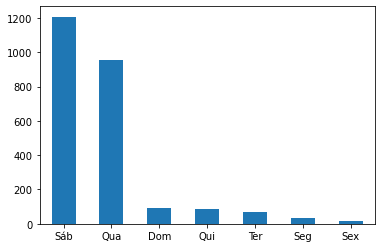

In [146]:
df['semana'].value_counts().plot.bar();
plt.xticks(rotation=0);

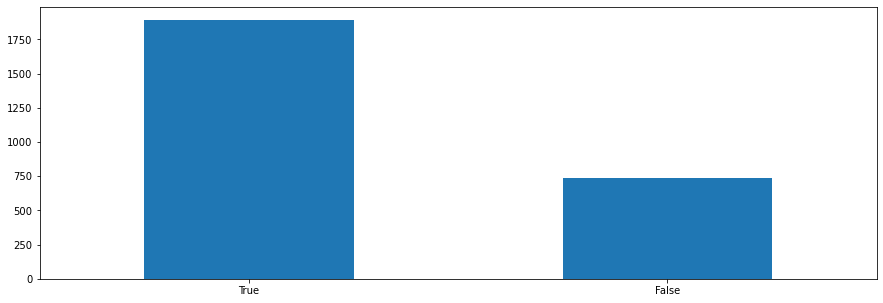

In [72]:
plt.figure(figsize=(15,5))
df['acc'].value_counts().plot.bar()
plt.xticks(rotation=0);

In [47]:
df['g6'].value_counts(normalize=False).head(10)

0     1893
1      418
2       99
3       23
4       12
5        3
6        2
52       1
17       1
7        1
Name: g6, dtype: int64

In [48]:
df.isnull().sum()

cs             265
ufs            265
data           176
semana         176
d1             176
d2             176
d3             176
d4             176
d5             176
d6             176
g6             176
g5             176
g4             176
r1             176
cg            2118
ufg           1916
acc              0
estimativa     176
dtype: int64

# data analysis

In [49]:
# df = df.dropna(how='any') #apagar qualquer linhas com pelo menos um 'NAN'

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2630 entries, 1.0 to 2454.0
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cs          2365 non-null   object        
 1   ufs         2365 non-null   object        
 2   data        2454 non-null   datetime64[ns]
 3   semana      2454 non-null   object        
 4   d1          2454 non-null   float64       
 5   d2          2454 non-null   float64       
 6   d3          2454 non-null   float64       
 7   d4          2454 non-null   float64       
 8   d5          2454 non-null   float64       
 9   d6          2454 non-null   float64       
 10  g6          2454 non-null   float64       
 11  g5          2454 non-null   float64       
 12  g4          2454 non-null   float64       
 13  r1          2454 non-null   float64       
 14  cg          512 non-null    object        
 15  ufg         714 non-null    object        
 16  acc         2630 n

In [51]:
df.ufg.value_counts(normalize=False).head(10)

SP    187
MG     77
RJ     75
PR     71
BA     35
RS     33
DF     31
ES     22
GO     19
SC     19
Name: ufg, dtype: int64

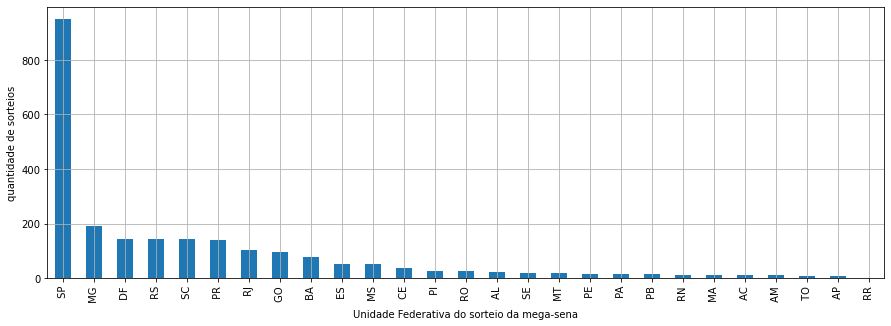

In [148]:
plt.figure(figsize=(15,5))
# plt.bar(df.data,df.g6)
df['ufs'].value_counts().plot.bar();
plt.xlabel('Unidade Federativa do sorteio da mega-sena')
plt.ylabel('quantidade de sorteios')
plt.grid();

In [53]:
# plt.figure(figsize=(15,5))
# sns.boxplot(df['a'], df['g6'])
# plt.title('Média de Ganhadores')
# plt.xticks(rotation=90)
# plt.locator_params(axis='y', nbins=20)
# plt.show();

In [54]:
# sns.stripplot(x='local', y='g6', data=df)
# plt.xticks(rotation=90)

In [55]:
df.ufs.value_counts(normalize=False).head(10)

 SP    946
 MG    193
 DF    145
 RS    144
 SC    143
 PR    139
 RJ    104
 GO     96
 BA     77
 ES     54
Name: ufs, dtype: int64

In [29]:
df.tail()

,cs,ufs,data,semana,d1,d2,d3,d4,d5,d6,g6,g5,g4,r1,acc,estimativa
concurso,,,,,,,,,,,,,,,,
2450,São Paulo,SP,2022-02-02,Qua,2,6,11,15,17,39,0,94,5633,0,True,26000000
2451,São Paulo,SP,2022-02-05,Sáb,13,26,31,46,51,60,1,60,4536,26422347,False,3000000
2452,São Paulo,SP,2022-02-09,Qua,8,10,51,56,57,58,0,23,2117,0,True,7000000
2453,São Paulo,SP,2022-02-12,Sáb,10,14,15,24,34,44,0,63,3892,0,True,12000000
2454,São Paulo,SP,2022-02-16,Qua,9,14,22,24,44,47,0,49,4523,0,True,31000000


In [57]:
df.columns

Index(['cs', 'ufs', 'data', 'semana', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'g6',
       'g5', 'g4', 'r1', 'cg', 'ufg', 'acc', 'estimativa'],
      dtype='object')

In [149]:
df

,cs,ufs,data,semana,d1,d2,d3,d4,d5,d6,g6,g5,g4,r1,acc,estimativa
concurso,,,,,,,,,,,,,,,,
1,Brasília,DF,1996-03-11,Seg,4,5,30,33,41,52,0,17,2016,0,True,0
2,Belo Horizonte,MG,1996-03-18,Seg,9,37,39,41,43,49,1,65,4488,2307162,False,0
3,Brasília,DF,1996-03-25,Seg,10,11,29,30,36,47,2,62,4261,391193,False,0
4,Santo André,SP,1996-04-01,Seg,1,5,6,27,42,59,0,39,3311,0,True,0
5,Brasília,DF,1996-04-08,Seg,1,2,6,16,19,46,0,98,5399,0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,São Paulo,SP,2022-02-09,Qua,8,10,51,56,57,58,0,23,2117,0,True,7000000
2453,São Paulo,SP,2022-02-12,Sáb,10,14,15,24,34,44,0,63,3892,0,True,12000000
2454,São Paulo,SP,2022-02-16,Qua,9,14,22,24,44,47,0,49,4523,0,True,31000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2630 entries, 1.0 to 2454.0
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cs          2365 non-null   object        
 1   ufs         2365 non-null   object        
 2   data        2454 non-null   datetime64[ns]
 3   semana      2454 non-null   object        
 4   d1          2454 non-null   float64       
 5   d2          2454 non-null   float64       
 6   d3          2454 non-null   float64       
 7   d4          2454 non-null   float64       
 8   d5          2454 non-null   float64       
 9   d6          2454 non-null   float64       
 10  g6          2454 non-null   float64       
 11  g5          2454 non-null   float64       
 12  g4          2454 non-null   float64       
 13  r1          2454 non-null   float64       
 14  acc         2630 non-null   bool          
 15  estimativa  2454 non-null   float64       
dtypes: bool(1), dateti

In [150]:
# dfd = df.reset_index()
dfd = df.copy()

In [151]:
dfd = dfd.drop(['cs', 'ufs', 'data', 'semana',
                 'g6', 'g5', 'g4', 'r1',
#                 'cg', 'ufg', 
                'estimativa', 'acc'],axis = 1)

In [152]:
# data frame para análise dos resultados
dfd.tail(10)

,d1,d2,d3,d4,d5,d6
concurso,,,,,,
2447,13,19,29,42,49,52
2448,18,30,32,35,40,48
2449,14,20,21,31,49,52
2450,2,6,11,15,17,39
2451,13,26,31,46,51,60
2452,8,10,51,56,57,58
2453,10,14,15,24,34,44
2454,9,14,22,24,44,47
2455,21,38,50,53,56,59


In [36]:
dfd['d1'].mode()

0   1
dtype: float64

In [63]:
# dfd.reset_index()

In [64]:
dfd.value_counts()

d1  d2  d3  d4  d5  d6
50  51  56  57  58  59    1
4   19  27  28  29  31    1
    21  25  33  36  46    1
    20  30  41  47  58    1
        24  35  47  59    1
                         ..
10  14  26  35  36  49    1
        25  29  33  57    1
        22  41  42  53    1
        16  30  32  36    1
1   2   3   11  28  43    1
Length: 2454, dtype: int64

In [65]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2630 entries, 1.0 to 2454.0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d1      2454 non-null   float64
 1   d2      2454 non-null   float64
 2   d3      2454 non-null   float64
 3   d4      2454 non-null   float64
 4   d5      2454 non-null   float64
 5   d6      2454 non-null   float64
dtypes: float64(6)
memory usage: 143.8 KB


In [37]:
dfd.shape

(2630, 6)

In [67]:
df[['d1','d2','d3','d4','d5','d6']].value_counts().tail()

d1  d2  d3  d4  d5  d6
10  14  26  35  36  49    1
        25  29  33  57    1
        22  41  42  53    1
        16  30  32  36    1
1   2   3   11  28  43    1
dtype: int64

In [68]:
# NÚMERO DE OCORRÊNCIAS DE CADA NÚMERO NA MEGA-SENA
x = 37
dfd.isin([x]).sum(axis=0)
dfd.isin([x]).sum(axis=0).sum()

266

In [69]:
dfd.tail(10)

,d1,d2,d3,d4,d5,d6
concurso,,,,,,
2445,11,25,32,37,47,56
2446,1,13,27,41,51,58
2447,13,19,29,42,49,52
2448,18,30,32,35,40,48
2449,14,20,21,31,49,52
2450,2,6,11,15,17,39
2451,13,26,31,46,51,60
2452,8,10,51,56,57,58
2453,10,14,15,24,34,44


In [38]:
dfd.loc[[2454]]

,d1,d2,d3,d4,d5,d6
concurso,,,,,,
2454,9,14,22,24,44,47


In [153]:
dfd.describe()

,d1,d2,d3,d4,d5,d6
count,2456,2456,2456,2456,2456,2456
mean,9,17,26,35,44,52
std,7,9,10,10,9,7
min,1,2,3,8,11,22
25%,3,10,19,28,38,49
50%,7,16,26,35,44,54
75%,12,23,33,42,51,58
max,50,51,56,58,59,60


In [154]:
dff = {}
for i in range (60):
    dff [i+1] = dfd.isin([i+1]).sum(axis=0).sum()

In [155]:
# listar em ordem crescente cada dezena e o respectivo número de ocorrência 
for i in sorted(dff, key = dff.get, reverse=True): print (i, dff[i])

53 280
10 279
5 269
42 268
37 266
4 264
33 264
23 261
27 261
30 261
28 259
34 259
41 259
54 259
29 257
35 257
44 257
11 256
17 256
43 256
51 255
16 254
24 254
32 253
38 253
36 252
49 252
2 251
13 251
56 250
6 249
8 247
52 247
46 245
18 241
50 241
58 240
12 239
1 237
20 237
25 236
40 235
45 235
7 234
47 234
19 233
39 233
57 233
60 233
9 232
14 232
31 232
59 232
48 227
3 225
22 216
15 215
21 211
55 207
26 205


In [156]:
# biblioteca necessária para ordenar o dicionária pelo valor
from operator import itemgetter

In [157]:
# ordenar o dicionário pelo valor
print ('dezena | frequência')
for chave, valor in sorted(dff.items(), key=itemgetter(1), reverse=True):
    print ("  {}       {}".format(chave, valor))

dezena | frequência
  53       280
  10       279
  5       269
  42       268
  37       266
  4       264
  33       264
  23       261
  27       261
  30       261
  28       259
  34       259
  41       259
  54       259
  29       257
  35       257
  44       257
  11       256
  17       256
  43       256
  51       255
  16       254
  24       254
  32       253
  38       253
  36       252
  49       252
  2       251
  13       251
  56       250
  6       249
  8       247
  52       247
  46       245
  18       241
  50       241
  58       240
  12       239
  1       237
  20       237
  25       236
  40       235
  45       235
  7       234
  47       234
  19       233
  39       233
  57       233
  60       233
  9       232
  14       232
  31       232
  59       232
  48       227
  3       225
  22       216
  15       215
  21       211
  55       207
  26       205


In [158]:
# GERAR dataframe com ordem crescente de cada dezena e o respectivo número de ocorrência
ddff = pd.DataFrame(columns=['dezena','frequência'])
for chave, valor in sorted(dff.items(), key=itemgetter(1), reverse=True):
     ddff.loc[chave] = [chave] + [valor]
ddff = ddff.reset_index()
ddff = ddff.drop(['index'],axis = 1)

In [159]:
ddff.head(15)

,dezena,frequência
0,53,280
1,10,279
2,5,269
3,42,268
4,37,266
5,4,264
6,33,264
7,23,261
8,27,261
9,30,261


In [61]:
ddff.loc[38:43]

,dezena,frequência
38,1,237
39,20,237
40,25,236
41,45,235
42,7,234
43,40,234


In [78]:
print (dff)

{1: 237, 2: 251, 3: 225, 4: 264, 5: 269, 6: 249, 7: 234, 8: 247, 9: 232, 10: 279, 11: 256, 12: 239, 13: 251, 14: 232, 15: 215, 16: 254, 17: 256, 18: 241, 19: 233, 20: 237, 21: 210, 22: 216, 23: 261, 24: 254, 25: 236, 26: 205, 27: 261, 28: 258, 29: 257, 30: 261, 31: 232, 32: 253, 33: 264, 34: 258, 35: 257, 36: 252, 37: 266, 38: 252, 39: 233, 40: 234, 41: 258, 42: 268, 43: 256, 44: 257, 45: 235, 46: 245, 47: 234, 48: 227, 49: 252, 50: 240, 51: 255, 52: 246, 53: 279, 54: 259, 55: 206, 56: 249, 57: 233, 58: 240, 59: 231, 60: 233}


In [79]:
dff.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [80]:
dff.values()

dict_values([237, 251, 225, 264, 269, 249, 234, 247, 232, 279, 256, 239, 251, 232, 215, 254, 256, 241, 233, 237, 210, 216, 261, 254, 236, 205, 261, 258, 257, 261, 232, 253, 264, 258, 257, 252, 266, 252, 233, 234, 258, 268, 256, 257, 235, 245, 234, 227, 252, 240, 255, 246, 279, 259, 206, 249, 233, 240, 231, 233])

In [81]:
d = dfd.d1
d.value_counts(bins=6)
d.value_counts()

1     237
2     228
4     207
3     186
5     179
6     153
7     151
8     135
10    122
9     115
11     86
12     85
13     68
14     58
15     57
17     56
16     51
18     35
20     34
19     33
23     24
22     22
21     22
25     20
24     16
26     16
28     10
27      9
29      8
31      7
30      6
33      4
32      3
35      3
50      1
39      1
46      1
34      1
38      1
36      1
43      1
41      1
Name: d1, dtype: int64

In [82]:
freq = dfd.groupby(['d1']).count() 

In [83]:
freq

,d2,d3,d4,d5,d6
d1,,,,,
1,237,237,237,237,237
2,228,228,228,228,228
3,186,186,186,186,186
4,207,207,207,207,207
5,179,179,179,179,179
6,153,153,153,153,153
7,151,151,151,151,151
8,135,135,135,135,135
9,115,115,115,115,115


In [84]:
df['d1'].value_counts(normalize=True).head(10)

1    0
2    0
4    0
3    0
5    0
6    0
7    0
8    0
10   0
9    0
Name: d1, dtype: float64

In [85]:
df['d1'].value_counts(sort=True, ascending=False).head(10)

1     237
2     228
4     207
3     186
5     179
6     153
7     151
8     135
10    122
9     115
Name: d1, dtype: int64

In [86]:
df.loc[2440]

cs                      São Paulo
ufs                            SP
data          2021-12-31 00:00:00
semana                        Sex
d1                             12
d2                             15
d3                             23
d4                             32
d5                             33
d6                             46
g6                              2
g5                           1712
g4                         143494
r1                      189062364
cg                      CABO FRIO
ufg                            RJ
acc                         False
estimativa                3000000
Name: 2440.0, dtype: object

In [87]:
df.dtypes

cs                    object
ufs                   object
data          datetime64[ns]
semana                object
d1                   float64
d2                   float64
d3                   float64
d4                   float64
d5                   float64
d6                   float64
g6                   float64
g5                   float64
g4                   float64
r1                   float64
cg                    object
ufg                   object
acc                     bool
estimativa           float64
dtype: object

In [88]:
df.select_dtypes(include='number').tail()

,d1,d2,d3,d4,d5,d6,g6,g5,g4,r1,estimativa
concurso,,,,,,,,,,,
2450,2,6,11,15,17,39,0,94,5633,0,26000000
2451,13,26,31,46,51,60,1,60,4536,26422347,3000000
2452,8,10,51,56,57,58,0,23,2117,0,7000000
2453,10,14,15,24,34,44,0,63,3892,0,12000000
2454,9,14,22,24,44,47,0,49,4523,0,31000000


In [89]:
df.shape

(2630, 18)

In [90]:
df.index

Float64Index([   1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,    8.0,
                 9.0,   10.0,
              ...
              2445.0, 2446.0, 2447.0, 2448.0, 2449.0, 2450.0, 2451.0, 2452.0,
              2453.0, 2454.0],
             dtype='float64', name='concurso', length=2630)

In [91]:
df.count()

cs            2365
ufs           2365
data          2454
semana        2454
d1            2454
d2            2454
d3            2454
d4            2454
d5            2454
d6            2454
g6            2454
g5            2454
g4            2454
r1            2454
cg             512
ufg            714
acc           2630
estimativa    2454
dtype: int64

In [92]:
df[df['d1'] % 2 == 0]

,cs,ufs,data,semana,d1,d2,d3,d4,d5,d6,g6,g5,g4,r1,cg,ufg,acc,estimativa
concurso,,,,,,,,,,,,,,,,,,
1,Brasília,DF,1996-03-11,Seg,4,5,30,33,41,52,0,17,2016,0,NaN,NaN,True,0
3,Brasília,DF,1996-03-25,Seg,10,11,29,30,36,47,2,62,4261,391193,NaN,RN,False,0
8,Brasília,DF,1996-04-29,Seg,4,17,37,38,47,53,0,60,5262,0,NaN,NaN,True,0
9,Brasília,DF,1996-05-06,Seg,8,43,54,55,56,60,0,17,2175,0,NaN,NaN,True,0
10,Brasília,DF,1996-05-13,Seg,4,18,21,25,38,57,0,251,12590,0,NaN,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,São Paulo,SP,2022-01-27,Qui,18,30,32,35,40,48,0,53,3529,0,NaN,NaN,True,36000000
2449,São Paulo,SP,2022-01-29,Sáb,14,20,21,31,49,52,1,65,3771,36777767,BLUMENAU,SC,False,20000000
2450,São Paulo,SP,2022-02-02,Qua,2,6,11,15,17,39,0,94,5633,0,NaN,NaN,True,26000000


In [93]:
df.columns.values

array(['cs', 'ufs', 'data', 'semana', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'g6', 'g5', 'g4', 'r1', 'cg', 'ufg', 'acc', 'estimativa'],
      dtype=object)

In [94]:
df['acc'].size

2630

# Script

In [160]:
# GERAR BILHETES DE PALPITE DE JOGO PARA A MEGA-SENA
# by geanclm in 15/05/2021 19:20h

# importar bibliotecas necessárias
import random, time
from datetime import datetime
from pytz import timezone
from numpy.random import default_rng

In [161]:
# registro_data_e_hora_completo = time.ctime()
hoje = datetime.now()
fuso_horario = timezone("America/Sao_Paulo")
data_e_hora = hoje.astimezone(fuso_horario)
agora = data_e_hora.strftime("%d/%m/%Y %H:%M"+"h")

In [162]:
bilhetes = int(input("Quantos volantes deseja apostar?: "))
i = 0
while i < bilhetes:
    print (f'''
    PALPITE {i+1}:\nVOLANTE PARA A MEGA SENA''')  
    print (sorted((random.sample(range(1,60),6))))
    i = i + 1
    time.sleep (1)
print ('\n')  
print (f'''{bilhetes} bilhete(s) gerado(s) em {agora}\nBOA SORTE!''')

Quantos volantes deseja apostar?: 3

    PALPITE 1:
VOLANTE PARA A MEGA SENA
[10, 18, 34, 37, 45, 47]

    PALPITE 2:
VOLANTE PARA A MEGA SENA
[3, 11, 18, 24, 41, 55]

    PALPITE 3:
VOLANTE PARA A MEGA SENA
[21, 24, 30, 32, 49, 57]


3 bilhete(s) gerado(s) em 24/02/2022 17:21h
BOA SORTE!
